In [1]:
%matplotlib notebook


In [2]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation



<IPython.core.display.Javascript object>


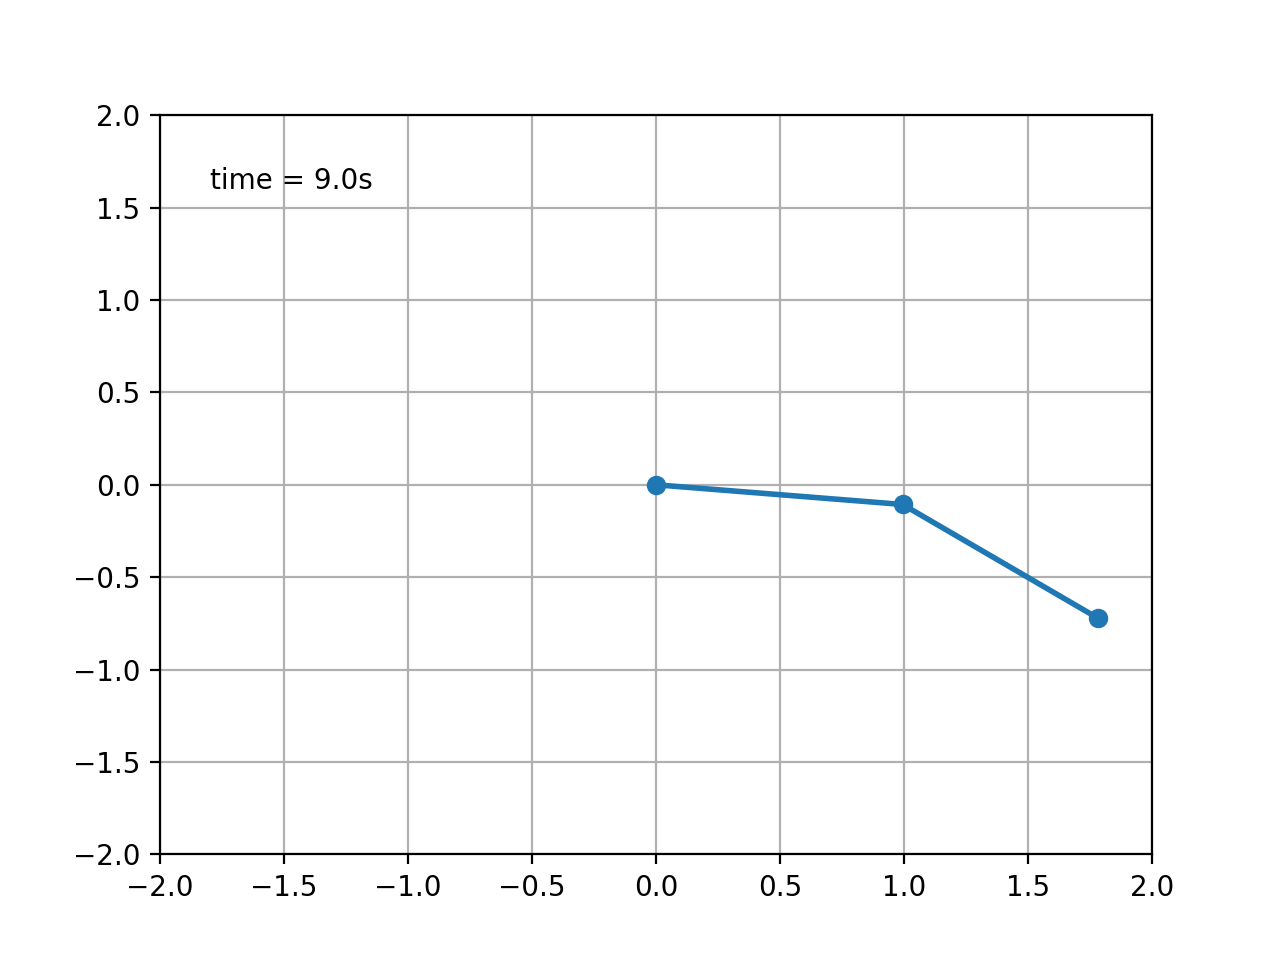

In [3]:

"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c


G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
plt.show()

<IPython.core.display.Javascript object>


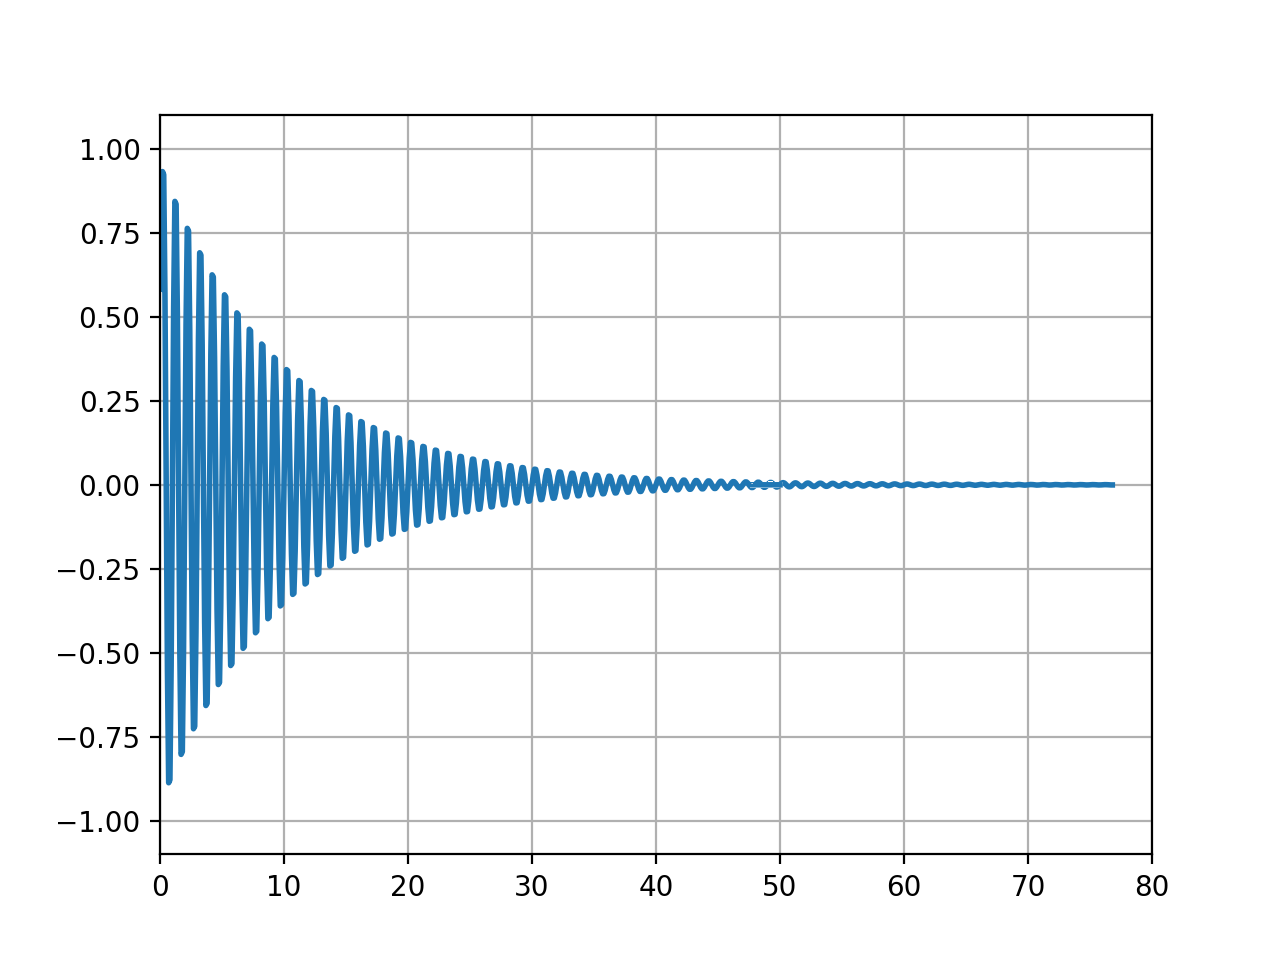

In [4]:
"""
=====
Decay
=====

This example showcases a sinusoidal decay animation.
"""


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

<IPython.core.display.Javascript object>


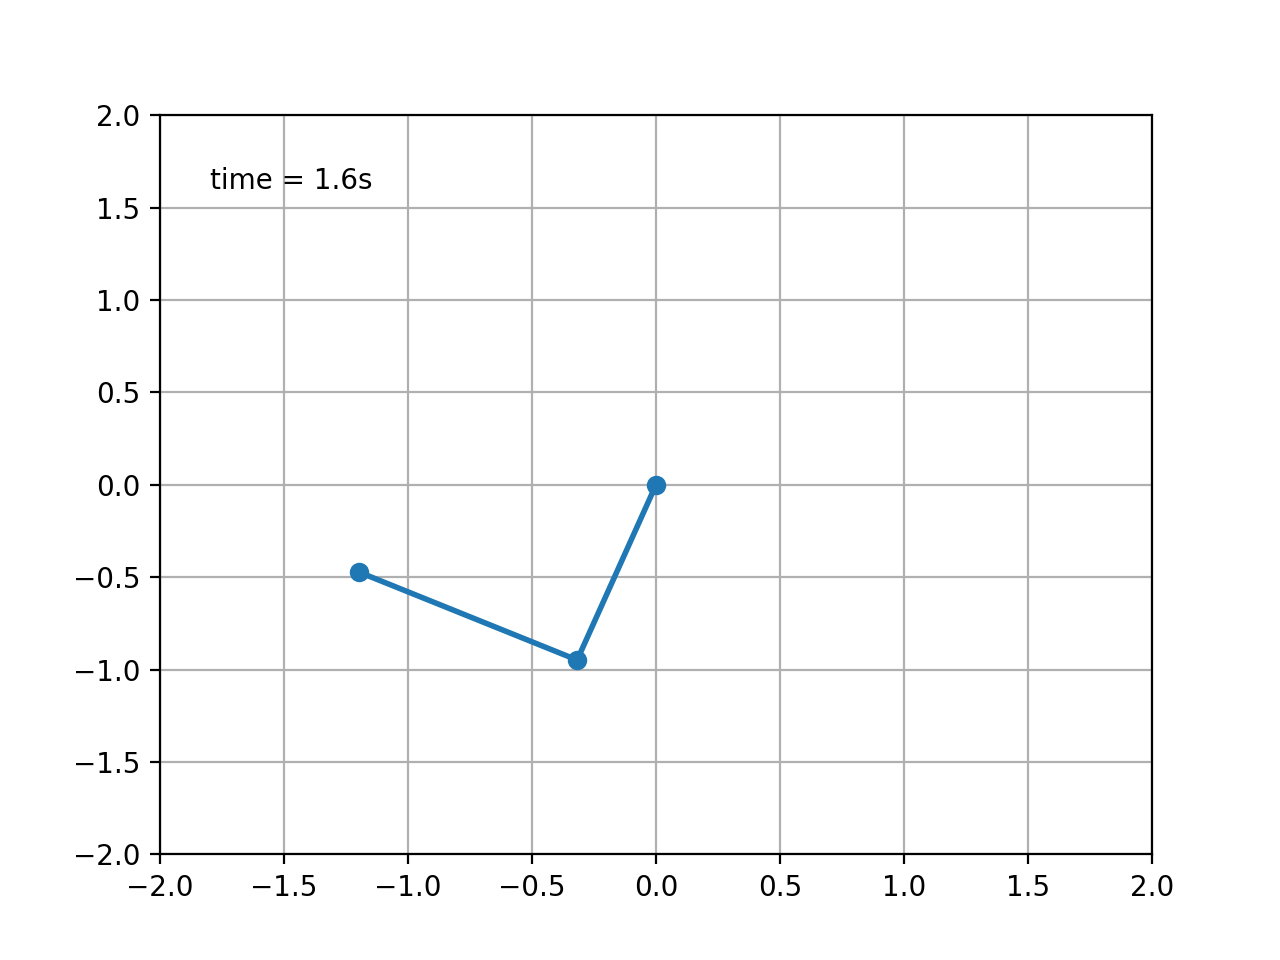

In [5]:

"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
plt.show()

In [6]:

"""
===========================
The single spring problem
===========================

This animation illustrates the single spring problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
k = 10.0 # Spring constant


def derivs(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    dydx[1] = -k/M1*state[0]

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.01
t = np.arange(0.0, 20, dt)

# initial state x0=1, v0=0
x0 = 1.0
v0 = 0.0

# initial state
state = np.array([x0, v0])
print(state)

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = y[:, 0]
#y1 = -L1*cos(y[:, 0])

v1 = y[:, 1]
#y2 = -L2*cos(y[:, 2]) + y1



[1. 0.]


<IPython.core.display.Javascript object>


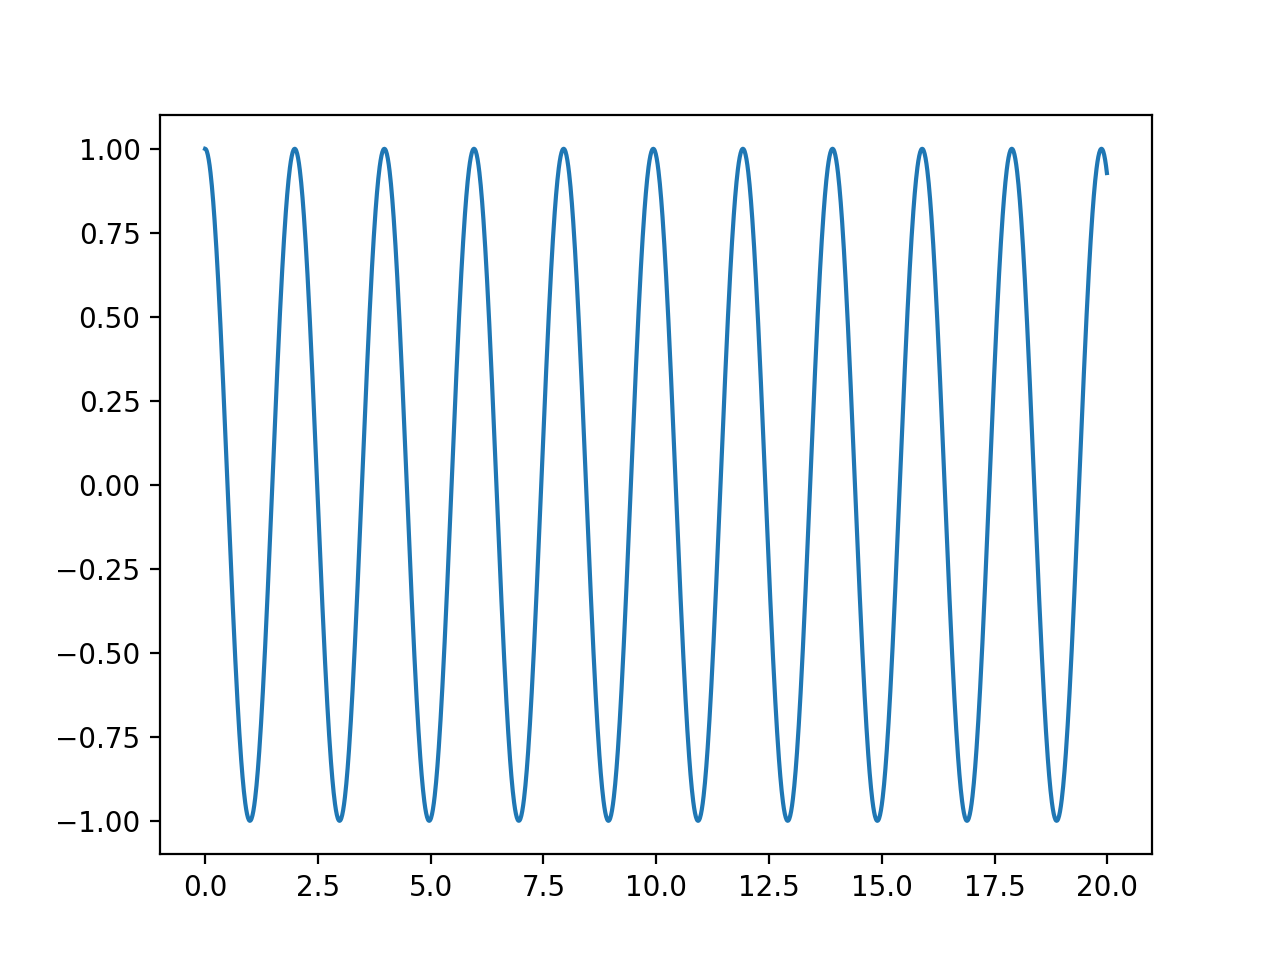

In [7]:
fix, ax = plt.subplots()
ax.plot(t,x1)


<IPython.core.display.Javascript object>


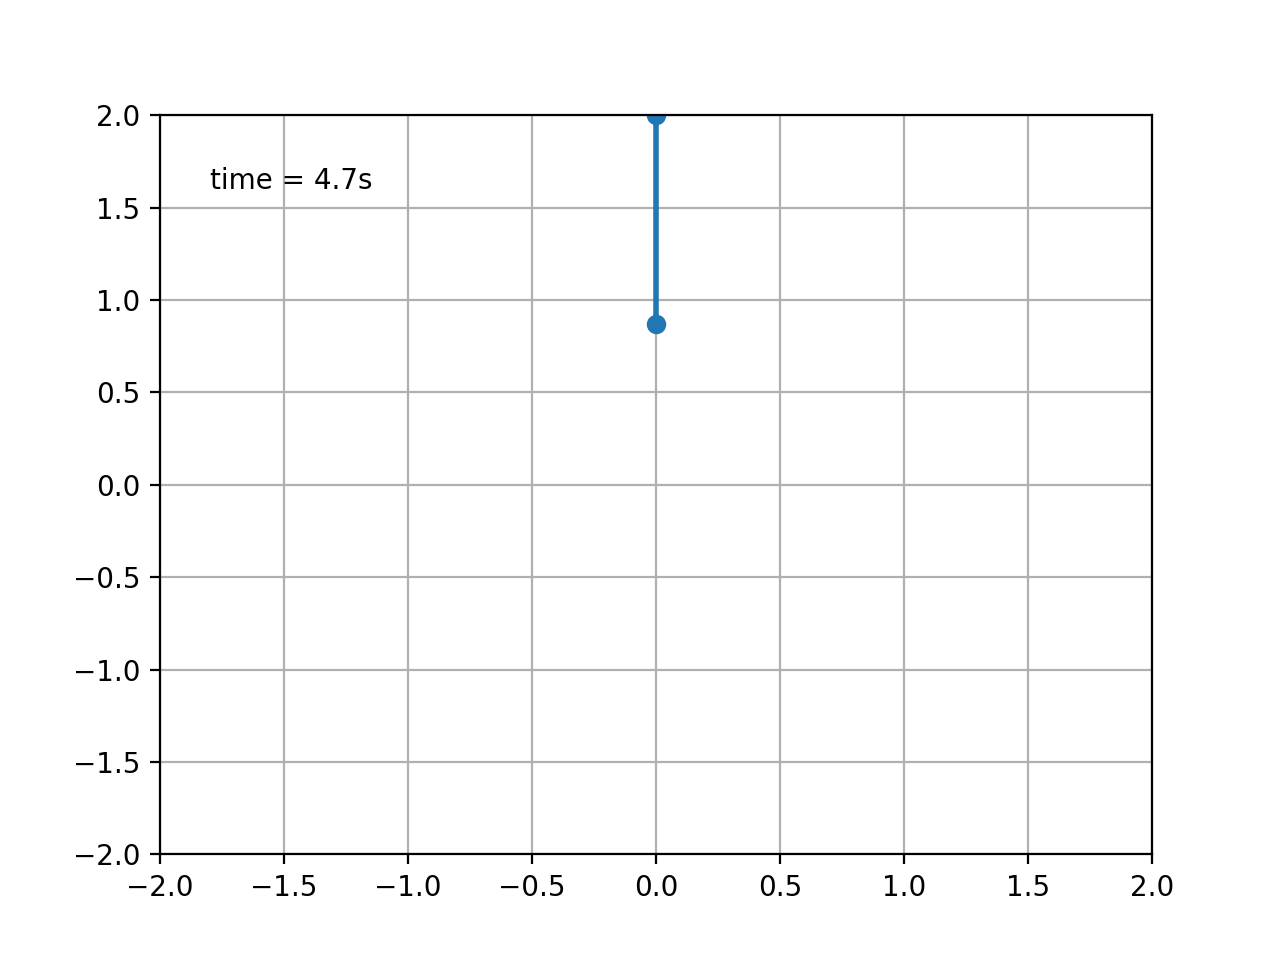

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, 0*x1[i]]
    thisy = [2, x1[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('single_spring.mp4', fps=100)
plt.show()

In [9]:

"""
===========================
The single spring problem
===========================

This animation illustrates the single spring problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.81  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 2.0  # mass of pendulum 2 in kg
M3 = 3.0  # mass of pendulum 3 in kg
k1 = 3.0 # Spring constant
k2 = 3.0 # Spring constant
k3 = 3.0 # Spring constant
c1 = 0.3
c2 = 0.3
c3 = 0.3




def derivs(state, t):
    # state[0]=x1;state[1]=x2;state[2]=x3;
    # state[3]=v1;state[4]=v2;state[5]=v3;

    dydx = np.zeros_like(state)
    dydx[0] = state[3]
    dydx[1] = state[4]
    dydx[2] = state[5]
    dydx[3] = -k1/M1*state[0]+k2/M1*(state[1]-state[0])-G-c1*state[3]
    dydx[4] = -k2/M2*(state[1]-state[0])+k3/M2*(state[2]-state[1])-G-c2*state[4]
    dydx[5] = -k3/M3*(state[2]-state[1])-G-c3*state[5]


    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.01
t = np.arange(0.0, 200, dt)

# initial state x0=1, v0=0
x0 = -5.886000
v0 = 0.0
x1 = -10.791
v1 = 0.0
x2 = 13.7340000 
v2 = 0.0

# initial state
state = np.array([x0, x1, x2, v0, v1, v2])
print(state)

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

y1 = y[:, 0]
y2 = y[:, 1]
y3 = y[:, 2]

#y1 = -L1*cos(y[:, 0])

#v1 = y[:, 1]
#y2 = -L2*cos(y[:, 2]) + y1

print(y1[np.size(y3)-1])
print(y2[np.size(y3)-1])
print(y3[np.size(y3)-1])

[ -5.886 -10.791  13.734   0.      0.      0.   ]
-19.619999870585684
-35.97000004967981
-45.77999999191881


In [10]:
fix, ax = plt.subplots()
ax.plot(t,y1)
ax.plot(t,y2)
ax.plot(t,y3)

<IPython.core.display.Javascript object>

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, 0*y1[i], 0*y2[i], 0*y3[i]]
    thisy = [2, y1[i], y2[i], y3[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('single_spring.mp4', fps=100)
plt.show()

<IPython.core.display.Javascript object>

In [9]:

"""
===========================
The single spring problem
===========================

This animation illustrates the single spring problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
# initial state x0=1, v0=0
#vx0 = 10.0
#vy0 = 10.0


def derivs(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    dydx[0] = state[2]
    dydx[2] = 0
    if state[1]>=0:
        dydx[1]=state[3]
        dydx[3] = -G
    else:
        dydx[1]=0
        dydx[3]=0
 
    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.01
t = np.arange(0.0, 10, dt)



# initial state
x0=0;y0=0;vx0=100;vy0=20;
state = np.array([x0, y0, vx0, vy0])
y=np.array([x0, y0, vx0, vy0])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = y[:, 0]
#y1 = -L1*cos(y[:, 0])

y1 = y[:, 1]
#y2 = -L2*cos(y[:, 2]) + y1


<IPython.core.display.Javascript object>


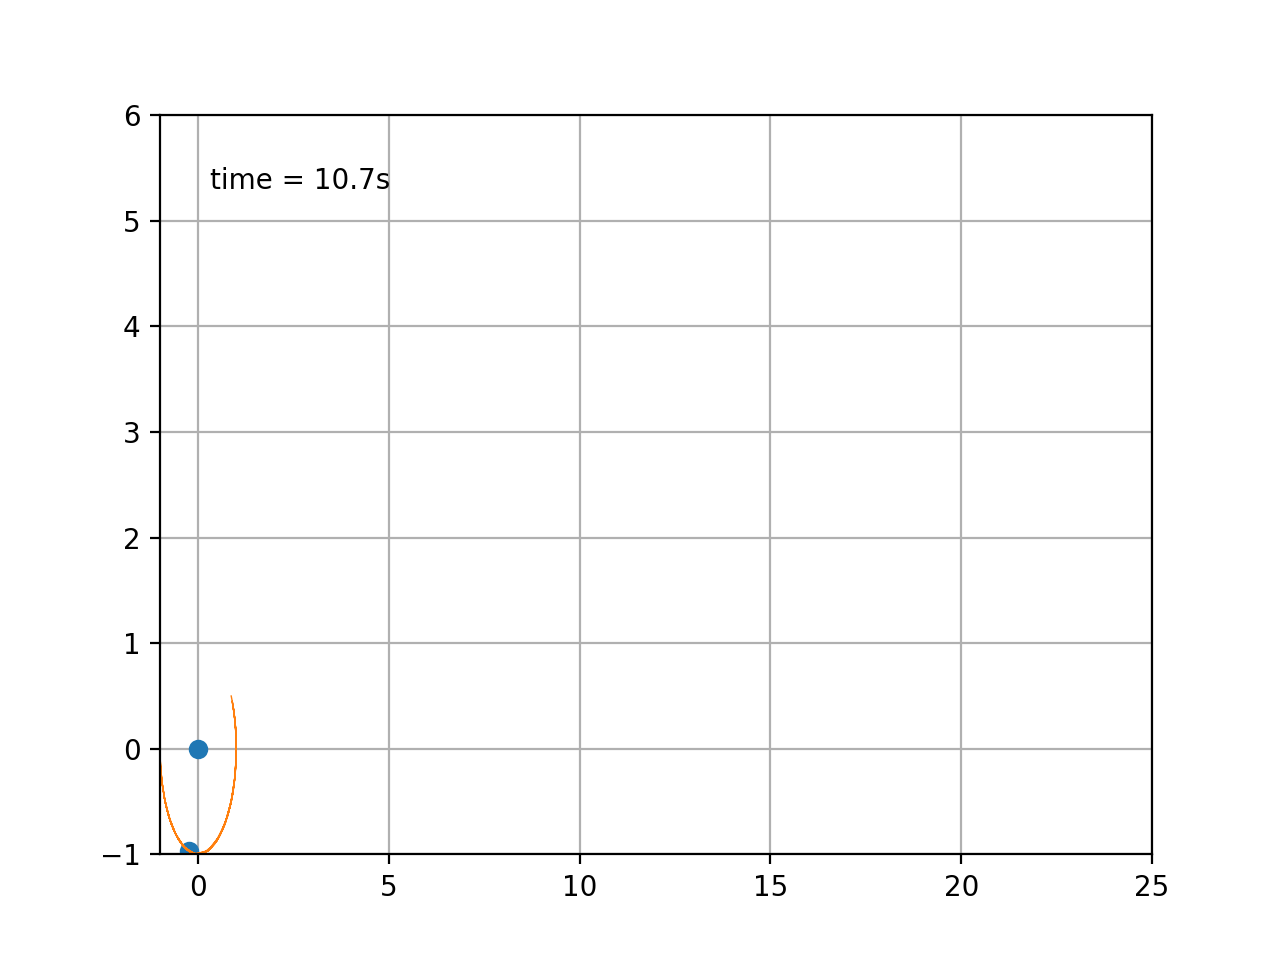

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 25), ylim=(-1, 6))
ax.grid()

line, = ax.plot([], [], 'o', lw=2)
dash, = ax.plot([], [], '-', lw=0.5)



time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    dash.set_data([], [])


    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i]]
    thisy = [0, y1[i]]
    dashx = [x1[0:i]]
    dashy = [y1[0:i]]
    line.set_data(thisx, thisy)
    dash.set_data(dashx, dashy)

    time_text.set_text(time_template % (i*dt))
    return line, time_text, dash

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('ballistic.mp4', fps=100)
plt.show()

In [12]:

"""
===========================
The single spring problem
===========================

This animation illustrates the single spring problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
km=0.25
ff=0.03
# initial state x0=1, v0=0
#vx0 = 10.0
#vy0 = 10.0


def derivs(state, t):
    # state[0]=x;state[1]=y
    dydx = np.zeros_like(state)
    dydx[0] = state[2]
    if state[1]>=0:
        dydx[1]=state[3]
        dydx[3] = -G + km*state[2] - ff*state[3]*state[3]
        dydx[2] =    - km*state[3] - ff*state[2]*state[2]
    else:
        dydx[1]=0
        dydx[3]=0
        dydx[2]=-state[2]


 
    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.01
t = np.arange(0.0,10, dt)



# initial state
x0=0;y0=0;vx0=100;vy0=20;
state = np.array([x0, y0, vx0, vy0])
y=np.array([x0, y0, vx0, vy0])
#print(state)

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

xd1 = y[:, 0]
#y1 = -L1*cos(y[:, 0])

yd1 = y[:, 1]
#y2 = -L2*cos(y[:, 2]) + y1



In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 100), ylim=(-1, 30))
ax.grid()

line, = ax.plot([], [], 'o', lw=2)
dash, = ax.plot([], [], ':', lw=1)



time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    dash.set_data([], [])


    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, xd1[i]]
    thisy = [0, yd1[i]]
    dashx = [xd1[0:i]]
    dashy = [yd1[0:i]]
    line.set_data(thisx, thisy)
    dash.set_data(dashx, dashy)

    time_text.set_text(time_template % (i*dt))
    return line, time_text, dash

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

ani.save('magnus.mp4', fps=100)
plt.show()

<IPython.core.display.Javascript object>

In [14]:
fix, ax = plt.subplots()
#ax.plot(x1,y1)
ax.plot(xd1,yd1,'--')


<IPython.core.display.Javascript object>

In [15]:
import sympy as sym
sym.init_printing()
t,k,m,c=sym.symbols('t k m c')
x=sym.Function('x')(t)
dxdt=x.diff(t)
d2xdt2=dxdt.diff(t)
expr = sym.Eq(m*d2xdt2, -k*x-c*dxdt)
expr

ModuleNotFoundError: No module named 'sympy'

In [ ]:
seq=sym.dsolve(expr)
seq

In [ ]:
c=0;k=10;m=1;C1=1;C2=-1
solvef=sym.lambdify(t,seq.rhs,'sympy')
xvals = np.arange(0,10,.1)
yvals = solvef(xvals)

In [ ]:
yvals

In [ ]:
y=sym.Function('y')(t)
y